#### NOTA:  Para Realizar ese ejercicio, utilie el archivo "cats_and_dogs_filtered.zip" que al descomprimirse, tiene 25000 Imagenes de Perros y gatos en un mismo directorio llamado "cats_and_dogs_filtered" Por el tamño no lo podia subir a github y lo coloque en un directorio llamado Imagenes,que estaba donde Clone este proyecto.  Por eso se ve que las direcciones relativas desd "./src/" al Zip Son "../../imagenes/" 

#### Para Bajar este archivo cree la ruta:"" y la dee Publica.
#### Finalmente, tambien quiero indicar que el Modelo, eel cual pesaba 200MB no lo podia subir al github y lo deje enesta dirección, Pueden bajarlo desdela url "https:"

In [1]:
import numpy as np
import pandas as pd 
import zipfile
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
import random
from PIL import Image
import os

####  El Archivo esta fuera del directorio del proyecto.  Es muy grande para subirlo al git.  Asi que este proyecto lo hice en local.  El ARCHIVO CONTIENE 12500 fotos de perros y 12500 fotos de Gatos.  Estan todas en un zip llamado **"cats_and_dogs_filtered.zip"**  Que al descomprimirse tiene las 25000 fotos en un mismo directoro.

In [68]:
# Ubicacion del Zip
zip_file_directory = "../../imagenes/cats_and_dogs_filtered.zip"
# Directorio donde voy a descomprimir el Zip
extract_directory = "../../imagenes/"

# Proceso de extraccion
with zipfile.ZipFile(zip_file_directory, "r") as files:
    files.extractall(extract_directory)

In [2]:
# Primero vamos a lsitar todos los archivos que estan en el directorio.  Al descomprimirse los archivos estan en **"/imagenes/cats_and_dogs_filtered"**
files = os.listdir("../../imagenes/cats_and_dogs_filtered")
print(files)

['cat_0.jpg', 'cat_1.jpg', 'cat_10.jpg', 'cat_100.jpg', 'cat_1000.jpg', 'cat_10000.jpg', 'cat_10001.jpg', 'cat_10002.jpg', 'cat_10003.jpg', 'cat_10004.jpg', 'cat_10005.jpg', 'cat_10006.jpg', 'cat_10007.jpg', 'cat_10008.jpg', 'cat_10009.jpg', 'cat_1001.jpg', 'cat_10010.jpg', 'cat_10011.jpg', 'cat_10012.jpg', 'cat_10013.jpg', 'cat_10014.jpg', 'cat_10015.jpg', 'cat_10016.jpg', 'cat_10017.jpg', 'cat_10018.jpg', 'cat_10019.jpg', 'cat_1002.jpg', 'cat_10020.jpg', 'cat_10021.jpg', 'cat_10022.jpg', 'cat_10023.jpg', 'cat_10024.jpg', 'cat_10025.jpg', 'cat_10026.jpg', 'cat_10027.jpg', 'cat_10028.jpg', 'cat_10029.jpg', 'cat_1003.jpg', 'cat_10030.jpg', 'cat_10031.jpg', 'cat_10032.jpg', 'cat_10033.jpg', 'cat_10034.jpg', 'cat_10035.jpg', 'cat_10036.jpg', 'cat_10037.jpg', 'cat_10038.jpg', 'cat_10039.jpg', 'cat_1004.jpg', 'cat_10040.jpg', 'cat_10041.jpg', 'cat_10042.jpg', 'cat_10043.jpg', 'cat_10044.jpg', 'cat_10045.jpg', 'cat_10046.jpg', 'cat_10047.jpg', 'cat_10048.jpg', 'cat_10049.jpg', 'cat_1005.jpg'

In [3]:
# Todos los archivos tienen la palabra dog o cat en su nombre.  con eso podemos crear una columna que asocie el nombre 
# Del archivo y su contenido con la informacion que tiene dentro.

categories = ['dog' if file.split('_')[0] == 'dog' else 'cat' for file in files]

total_data = pd.DataFrame({'filename': files, 'category': categories})
total_data.head()

,filename,category
0,cat_0.jpg,cat
1,cat_1.jpg,cat
2,cat_10.jpg,cat
3,cat_100.jpg,cat
4,cat_1000.jpg,cat


In [4]:
print(total_data['category'].value_counts())

category
cat    12472
dog    12466
Name: count, dtype: int64


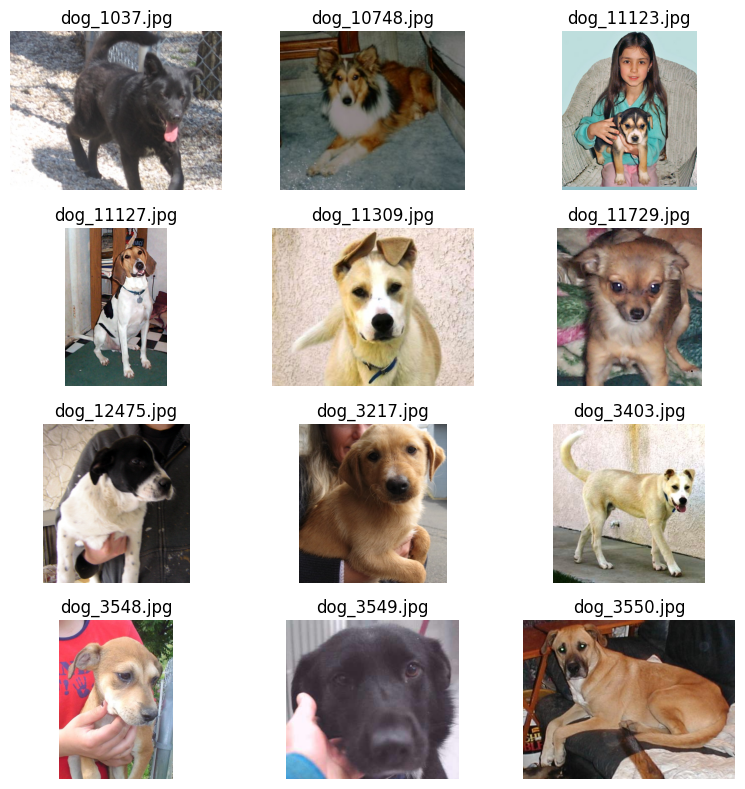

In [36]:
def mostrar_fotos(nfilas,ncolum,animale,directoio):
    imagenes = [file for file in files if file.startswith(animale)] #filtro solo los perros

    imagenes_prueba = []
    for i in range(12):
        imagenes_prueba.append(imagenes[i])

    fig, axes = plt.subplots(nfilas, ncolum, figsize=(8, 8))

    for i, ax in enumerate(axes.flat):
        img_path = os.path.join(directoio, imagenes_prueba[i])  
        img = Image.open(img_path)  
        ax.imshow(img) 
        ax.axis("off")  
        ax.set_title(imagenes_prueba[i])  

    plt.tight_layout()
    plt.show()


mostrar_fotos(4,3,'dog',"../../imagenes/cats_and_dogs_filtered")


Usando la misma función que defini antes

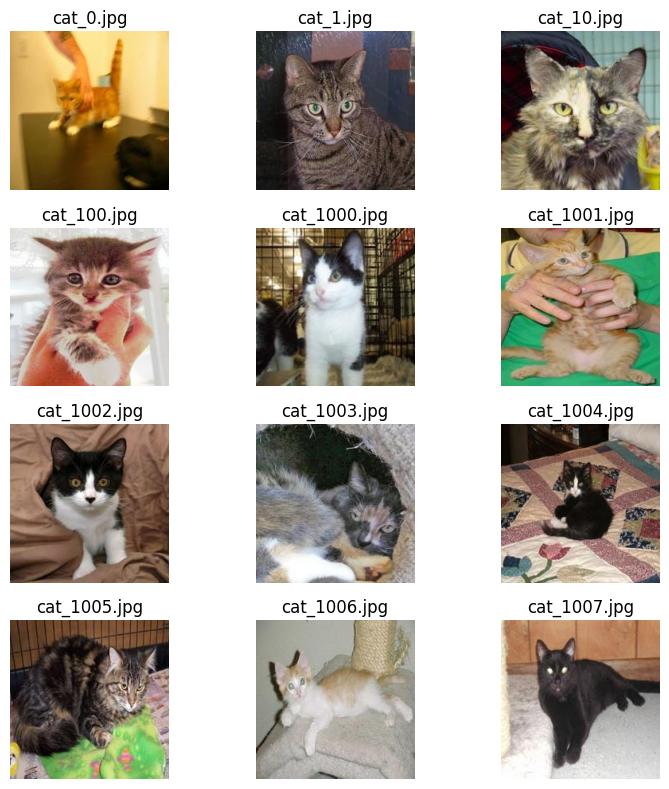

In [37]:

mostrar_fotos(4,3,'cat',"../../imagenes/cats_and_dogs_filtered")


In [67]:
from PIL import Image

folder = "../../imagenes/cats_and_dogs_filtered"

target_size = (200, 200)
filenames = os.listdir(folder)

for filename in filenames:
    img_path = os.path.join(folder, filename)  
        
    try:
        img = Image.open(img_path).resize(target_size)
        img.save(img_path)
        
    except Exception as e:
        print(f"Error procesando {filename}: {e}")

#### Despues del ajuste del Pixelado de las fotos algunas produjeron errores y crearon archivos de 0 KB o con errores.  Voy a Volver a sacar el listado, para crear la particion pero con el universo de los archivos Procesados.

In [16]:
import os
from PIL import Image

folder = "../../imagenes/cats_and_dogs_filtered"

imagenes_validas = []
total_archivos = len(files)

for f in files:
    ruta = os.path.join(folder, f)
    try:
        img = Image.open(ruta)
        img.verify()
        imagenes_validas.append(f)
    except Exception:
        pass  # No mostrar errores individuales

imagenes_invalidas = total_archivos - len(imagenes_validas)

print(f"Total imágenes válidas: {len(imagenes_validas)}")
print(f"Total imágenes inválidas: {imagenes_invalidas}")


Total imágenes válidas: 24797
Total imágenes inválidas: 141


In [18]:
# Con el paso anterior asegure que todo oo que esta en el DataFrame "total_data" son archivos validos
# Todos los archivos tienen la palabra dog o cat en su nombre.  con eso podemos crear una columna que asocie el nombre 
# Del archivo y su contenido con la informacion que tiene dentro.

categories = ['dog' if file.split('_')[0] == 'dog' else 'cat' for file in imagenes_validas]

total_data = pd.DataFrame({
    'filename': imagenes_validas,
    'category': categories
})

total_data.head()

,filename,category
0,cat_0.jpg,cat
1,cat_1.jpg,cat
2,cat_10.jpg,cat
3,cat_100.jpg,cat
4,cat_1000.jpg,cat


In [19]:
print(total_data['category'].value_counts())

category
dog    12466
cat    12331
Name: count, dtype: int64


In [22]:
# vamos a crear dos Dataframes con esas dos columnas.  Una para el traning y otra para el test.
#  Vamos a Separarla con al 20% y con un randon_state de 42

train_data, test_data = train_test_split(total_data, test_size=0.20, random_state=42)
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)
print(train_data['category'].value_counts())

category
dog    9997
cat    9840
Name: count, dtype: int64


#### No quedo perfectamente simetrico el Split. Principalmente por las imagenes que tenian fallas y no se procesaron correctamente

## PARTE 2: Ajustes de las imagenes para procesarlas

Los perceptrones aprenden mejor cuando la informacion esta normalizada de 0 a 1.  Vamos a lograr esto  a través de "ImageDataGenerator", desde el módulo de Keras en TensorFlow. Esta clase logra principalmente dos cosas: Normalizar imágenes (por ejemplo, escalar los píxeles entre 0 y 1)  y luego, Aplicar transformaciones aleatorias como rotaciones, zoom, volteo, etc., durante el entrenamiento.

La parte importante del proceso viene de como elegir los parametros.  En el procesamiento de Imagenes se crea un "ImageDataGenerator" para entenar el TrainingSet y otro para la validación y las pruebas.  En el Training se usan parametros que permiten no solo normalizar, sino que también se altera aleatoriamente las imágenes (haciendo zoom, rotandolas, volteandolas).

Asi la red aprende mejor cuando ve variaciones de la imagen. Y esto:

* Simula un dataset más grande.

* Evita que el modelo memorice (overfitting).

* Aumenta la capacidad del modelo para generalizar



In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Creo dos "ImageDataGenerator" como explique: Uno para el Entrenamiento que permite rotar, hacer Zoom para aumentar
# Espacio Muestral y evitar el OverFitting.   Esto lo llamare "GeneradorTraining"
# Y creamos otro lllamada "GeneradorPruebas" solamente para realizar el rescale.

GeneradorTraining = ImageDataGenerator(
    rescale=1./255,     
    shear_range=0.1,     
    zoom_range=0.2,      
    horizontal_flip=True 
)

GeneradorPruebas = ImageDataGenerator(rescale=1./255)


In [25]:
# La Variable "Folder" sigue conteniendo la dirección de donde estan Guardadas las imagenes
# Los DataFrame que contienen los listadps del Split del Training y de la Validación son "train_data" y "test_data"
# Ambos Dataframens contienen las Columnas "filename" que es el nombre de la imagen y "category" que contiene si era un Perro o un Gato.

ImgGenTraining = GeneradorTraining.flow_from_dataframe(
    dataframe=train_data,
    directory=folder,
    x_col="filename", 
    y_col="category",  
    target_size=(200, 200),
    batch_size=32,
    class_mode="categorical"
)

ImgGenTest = GeneradorPruebas.flow_from_dataframe(
    dataframe=test_data,
    directory=folder,
    x_col="filename",
    y_col="category",
    target_size=(200, 200),
    batch_size=32,
    class_mode="categorical"
)

Found 19837 validated image filenames belonging to 2 classes.
Found 4960 validated image filenames belonging to 2 classes.


In [26]:
# Esto solo lo hago para saber que hizo el class_mode con gato y perro
print(ImgGenTraining.class_indices)

{'cat': 0, 'dog': 1}


## Parte 3: Definimos el Modelo

#### En imagenes se suelen usar Redes Neurales Convolucionales.  Estas tiene dos caracteristicas principales, y explico como estoy creando el modelo porque estas redes son complicadas de crear.  Las dos parte en que esta dividido son lo kenels que son los que llamamos en espa►ol los filtros, estaas son como unas louas que recorren toda la imagen. Y ellas son en si, matrices, que en este caso las estoy usando de 3x3.

In [27]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation

model = Sequential()

#  Conv2D: capa convolucional con 32 filtros de tamaño 3x3.
#  activation='relu': función de activación ReLU (rectificador lineal), que introduce no linealidad.
#  input_shape=(200, 200, 3): las imágenes de entrada son de 200x200 píxeles con 3 canales (RGB).
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200,200,3)))

#  Reduce el tamaño de la imagen a la mitad (de 200x200 a 100x100, aproximadamente), ayudando a reducir parámetros y prevenir sobreajuste.
model.add(MaxPooling2D(pool_size=(2,2)))

# =====================================================================================================
# Esta es igual a la Anterior pero con 4 Filtros
# Aquí no necesitas el input_shape, porque esta capa ya sabe que su entrada viene de la capa anterior
model.add(Conv2D(64, (3, 3), activation='relu'))
# La salida se vuelve aún más pequeña, pero más profunda (más filtros = más características).
model.add(MaxPooling2D(pool_size=(2,2)))

# =====================================================================================================
# Aplanamos el volumen de salida de las capas anteriores a un vector 1D.
# Esto es necesario antes de conectar con una capa densa.
model.add(Flatten())

# =====================================================================================================
# Capa completamente conectada con 128 neuronas y ReLU.
model.add(Dense(128, activation='relu'))

# =====================================================================================================
# Dropout del 50%: durante el entrenamiento, apaga aleatoriamente 
# la mitad de las neuronas para evitar el sobreajuste.
model.add(Dropout(0.5))

# =====================================================================================================
#  Capa final de 2 neuronas (porque tienes 2 clases).
#  softmax: convierte la salida en probabilidades que suman 1
model.add(Dense(2, activation='softmax'))


# =====================================================================================================
#Terminando on las capas, concluimos con los prametros
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#  loss='categorical_crossentropy': función de pérdida para clasificación multiclase (aunque tengas solo 2 clases).
#  Ojo: esto implica que tus etiquetas deben estar one-hot encoded (por ejemplo, [1, 0] y [0, 1]).
#  optimizer='adam': optimizador muy eficiente.
#  metrics=['accuracy']: métrica de precisión.

## Entrrenamiento del modelo

In [28]:
history = model.fit(
    ImgGenTraining,
    validation_data=ImgGenTest,
    epochs=10
)

Epoch 1/10
620/620 [==============================] - 1433s 2s/step - loss: 0.7297 - accuracy: 0.6160 - val_loss: 0.6207 - val_accuracy: 0.6661
Epoch 2/10
620/620 [==============================] - 1507s 2s/step - loss: 0.5955 - accuracy: 0.6866 - val_loss: 0.5617 - val_accuracy: 0.7115
Epoch 3/10
620/620 [==============================] - 1097s 2s/step - loss: 0.5569 - accuracy: 0.7219 - val_loss: 0.5355 - val_accuracy: 0.7333
Epoch 4/10
620/620 [==============================] - 708s 1s/step - loss: 0.5130 - accuracy: 0.7513 - val_loss: 0.4948 - val_accuracy: 0.7694
Epoch 5/10
620/620 [==============================] - 733s 1s/step - loss: 0.4826 - accuracy: 0.7727 - val_loss: 0.4677 - val_accuracy: 0.7829
Epoch 6/10
620/620 [==============================] - 1362s 2s/step - loss: 0.4696 - accuracy: 0.7784 - val_loss: 0.4466 - val_accuracy: 0.7944
Epoch 7/10
620/620 [==============================] - 992s 2s/step - loss: 0.4503 - accuracy: 0.7916 - val_loss: 0.4336 - val_accuracy: 0.

In [29]:
model.save("modelo_entrenado.h5")
from keras.models import load_model
modelo_cargado = load_model("modelo_entrenado.h5")

c:\4geeks\Tareas\env\venv-perceptron\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [31]:
resultados = modelo_cargado.evaluate(ImgGenTest)
print("Loss en test:", resultados[0])
print("Accuracy en test:", resultados[1])

155/155 [==============================] - 38s 244ms/step - loss: 0.4215 - accuracy: 0.8137
Loss en test: 0.4215119779109955
Accuracy en test: 0.8137096762657166


Accuracy en test: 0.8137
→ Eso es 81.37% de precisión, es decir, el modelo clasifica correctamente aproximadamente 8 de cada 10 imágenes.

#### En el siguiente codigo, al ejecutarlo carga aleatoriamente un imagen del directorio (DEl listado que estamos seguro que abren) y probamos el modelos con una sola foto.

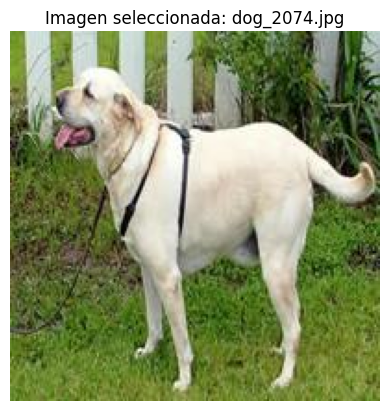

1/1 [==============================] - 28s 28s/step
Predicción: dog (confianza: 97.86%)


In [42]:
import random
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Ruta del directorio de imágenes
folder = "../../imagenes/cats_and_dogs_filtered"

# Obtener una imagen válida aleatoria
imagen_aleatoria = random.choice(imagenes_validas)
ruta_img = os.path.join(folder, imagen_aleatoria)

# Cargar y mostrar la imagen
img = load_img(ruta_img, target_size=(200, 200))  # Mismo tamaño que usaste para entrenar
plt.imshow(img)
plt.title(f"Imagen seleccionada: {imagen_aleatoria}")
plt.axis("off")
plt.show()

# Preprocesar la imagen para el modelo
img_array = img_to_array(img) / 255.0  # Escalamos como hicimos en entrenamiento
img_array = np.expand_dims(img_array, axis=0)  # El modelo espera un lote (batch)

# Realizar predicción
prediccion = modelo_cargado.predict(img_array)

# Interpretar resultado
clases = list(ImgGenTraining.class_indices.keys())  # ['cat', 'dog']
indice = np.argmax(prediccion)
etiqueta_predicha = clases[indice]
confianza = prediccion[0][indice]

print(f"Predicción: {etiqueta_predicha} (confianza: {confianza:.2%})")
